# 因子分析(FA: Factor Analysis)
Author: Yoshimasa Ogawa  
LastModified: 2015-12-19  

圓川隆夫『多変量のデータ解析』(1988年, 朝倉書店)第5章「主成分分析と正準相関分析」をPythonで実行します。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pyper
import matplotlib.pyplot as plt

In [2]:
# 関数定義
# 因子分析
def factanal(data, factors, rotation='none'):
    r = pyper.R(use_pandas='True')
    r.assign("data", data)
    r("result <- factanal(data, factors=%s, rotation='%s', scores='regression')" % (factors, rotation))
    result_var = pd.DataFrame(index=["固有値", "寄与率", "累積寄与率"])
    uniquenesses = pd.Series(r.get("result"))["uniquenesses"]
    Rstar = np.trace(data.corr() - np.diag(uniquenesses))
    result = pd.DataFrame(index=data.columns)
    Cumulative_Var = 0
    for i in range(factors):
        result["factor%s" % str(i+1)] = np.round(pd.Series(r.get("result"))["loadings"], 3).T[i]
        SS_loadings = np.dot(pd.Series(r.get("result"))["loadings"].T[i], pd.Series(r.get("result"))["loadings"].T[i].T)
        Proportion_Var = SS_loadings/Rstar
        Cumulative_Var += Proportion_Var
        result_var["factor%s" % str(i+1)] = [round(SS_loadings, 3),
                                                                           round(Proportion_Var, 3),
                                                                           round(Cumulative_Var, 3)]
    return result_var, result

# 棒グラフのプロット
def factplot(data, factors, result):
    for i in range(factors):
        plt.subplot(factors, 1, i+1)
        plt.bar(range(9), result["factor%s" % str(i+1)])
        plt.title('Factor%s' % str(i+1))
    plt.tight_layout()
    print(data.columns)

In [3]:
# データの読み込み
data = pd.read_csv("data/tab47.csv")
data.head()

,国語,社会,数学,理科,音楽,美術,保体,技家,英語
0,55,59,38,66,29,32,29,36,61
1,36,49,35,57,63,62,55,66,45
2,53,58,16,41,67,64,50,50,48
3,78,80,42,65,85,75,69,76,70
4,6,19,38,59,49,47,43,57,26


In [4]:
# 回転なし
result_nvar, result_n = factanal(data, 3)

In [5]:
result_nvar

,factor1,factor2,factor3
固有値,4.027,3.340,1.401
寄与率,0.459,0.381,0.160
累積寄与率,0.459,0.840,1.000


In [6]:
result_n

,factor1,factor2,factor3
国語,0.731,-0.016,0.650
社会,0.833,-0.005,0.544
数学,0.840,-0.000,-0.493
理科,0.909,-0.121,-0.393
音楽,0.129,0.981,-0.000
美術,0.143,0.972,0.117
保体,0.274,0.940,-0.088
技家,0.528,0.724,-0.405
英語,0.936,-0.108,0.317


Index([u'国語', u'社会', u'数学', u'理科', u'音楽', u'美術', u'保体', u'技家', u'英語'], dtype='object')


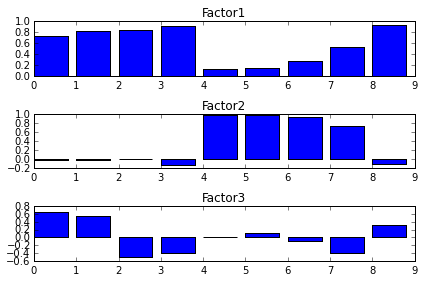

In [7]:
factplot(data, 3, result_n)

In [8]:
# varimax回転
result_vvar, result_v = factanal(data, 3, 'varimax')

In [9]:
result_vvar

,factor1,factor2,factor3
固有値,3.534,2.836,2.398
寄与率,0.403,0.323,0.274
累積寄与率,0.403,0.727,1.000


In [10]:
result_v

,factor1,factor2,factor3
国語,0.066,0.973,0.078
社会,0.093,0.966,0.223
数学,0.118,0.219,0.941
理科,0.006,0.348,0.935
音楽,0.989,0.014,-0.013
美術,0.980,0.110,-0.082
保体,0.969,0.053,0.156
技家,0.794,0.014,0.580
英語,0.008,0.880,0.464


Index([u'国語', u'社会', u'数学', u'理科', u'音楽', u'美術', u'保体', u'技家', u'英語'], dtype='object')


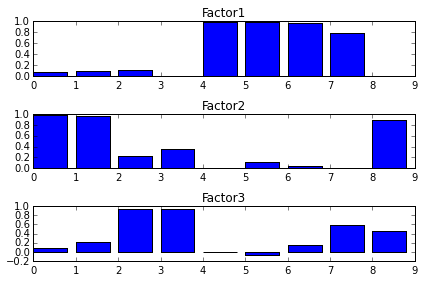

In [11]:
factplot(data, 3, result_v)

In [12]:
# promax回転
result_pvar, result_p = factanal(data, 3, 'promax')

In [13]:
result_pvar

,factor1,factor2,factor3
固有値,3.537,2.715,2.402
寄与率,0.403,0.310,0.274
累積寄与率,0.403,0.713,0.987


In [14]:
result_p

,factor1,factor2,factor3
国語,0.054,1.021,-0.128
社会,0.060,0.974,0.031
数学,-0.017,-0.021,0.986
理科,-0.131,0.120,0.964
音楽,1.012,0.006,-0.122
美術,1.012,0.127,-0.218
保体,0.966,0.002,0.059
技家,0.727,-0.151,0.556
英語,-0.062,0.818,0.327


Index([u'国語', u'社会', u'数学', u'理科', u'音楽', u'美術', u'保体', u'技家', u'英語'], dtype='object')


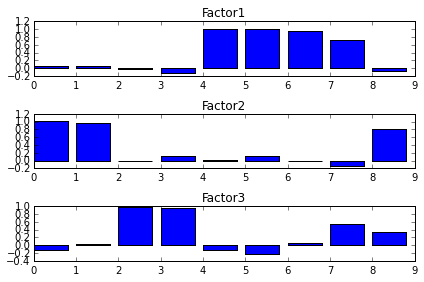

In [15]:
factplot(data, 3, result_p)